This notebook shows how to plot bar graph. A bar graph is a type of chart that presents data in the form of rectangular bars or columns, where the height or length of each bar represents the quantity or frequency of a particular category or variable. The bars are typically arranged along the horizontal (x) axis or the vertical (y) axis of the graph, and can be colored or shaded to distinguish between different data series or categories. Bar graphs are commonly used in statistics, economics, marketing, and other fields to visualize and compare data sets, and to show patterns, trends, and relationships between variables.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [18]:
def PlotBarGraph (fileAdress, columnName, savePath = None, figTitle = 'Bar Graph', xlabel = 'x' , ylabel = 'y', dropNA = False):
    
    """
        Plots Bar graph. The input to the function is an .xlsx or .csv format file and specified column to plot the bar graph.
        Arguments:
            fileAdress: adress to the .csv or .xlsx file.         
            columnName: name of the specified column to draw the bar graph based on its values.            
            savePath: a path containing the image name to save the figure.            
            figTitle: the title of the figure.
            xlabel: the label to use for x axis.
            ylabel: the label to use for y axis.
            dropNA: if True, then it will drop all the rows which they contain na for the specified column.
        Returns:
            a bar grpah saved in the specified directory.
    """   
    
    if '.csv' in fileAdress:
        data = pd.read_csv(fileAdress)
    else:
        data = pd.read_excel(fileAdress)
    if dropNA:    
        data.dropna(subset = [columnName], inplace = True)
    else:
        data[columnName] = data[columnName].fillna('none')
    
    uniqueValues = data[columnName].unique()
    uniqueValues_count = []
    for uniqueValue in uniqueValues:
        uniqueValues_count.append(list(data[columnName]).count(uniqueValue))
        
    fig, ax = plt.subplots()  
    my_cmap = plt.cm.get_cmap('GnBu')
    normalized_Values = [x / max(uniqueValues_count) for x in uniqueValues_count]
    colors = my_cmap(normalized_Values)
    
    
    mpl.rcParams['font.size'] = 20
    plt.bar(uniqueValues, uniqueValues_count, color = colors)
    plt.title(figTitle)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(uniqueValues)   
    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable = 'box')
    if savePath:
        plt.savefig(savePath, bbox_inches='tight', dpi=500, pad_inches = 0.5)
        plt.close()

C:\Users\User\AppData\Local\Temp/ipykernel_23624/348328947.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('GnBu')


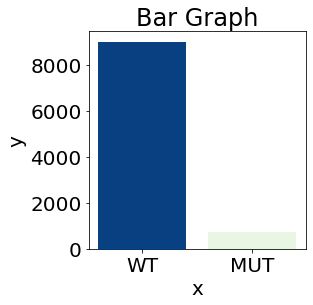

In [20]:
PlotBarGraph (fileAdress = "G:\My Drive\Data\TCGA-CRC-DX-MUTATIONS.csv", 
              columnName = 'KRAS', figTitle = 'Bar Graph', xlabel = 'x' , ylabel = 'y', dropNA = True)

C:\Users\User\AppData\Local\Temp/ipykernel_23624/348328947.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('GnBu')


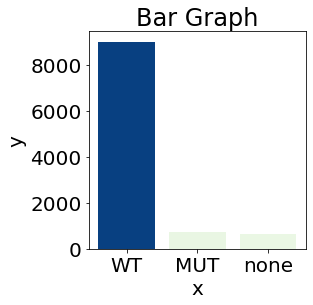

In [21]:
PlotBarGraph (fileAdress = "G:\My Drive\Data\TCGA-CRC-DX-MUTATIONS.csv", 
              columnName = 'KRAS', figTitle = 'Bar Graph', xlabel = 'x' , ylabel = 'y', dropNA = False)